# Linear and Logistic Regression

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Question 1

Consider the following training data:

$\mathbf{x^{(1)}} =\begin{bmatrix} 1 \\ 1  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 2 \\ 1  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 3 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 3 \\ 3  \\ \end{bmatrix} $

$y^{(1)} = 1.4$, $y^{(2)} = 0.5$, $y^{(3)} = 2$, $y^{(4)} = 2.5$

Our goal is to fit a Linear Regression that minimizes the sum of squared errors on the training data.

❓ Find the closed form solution for a linear regression that minimizes the sum of squared errors on the training data. You need to:
 1. Define matrix $\mathbf{X}$ with shape $n \times (d+1)$, accounting for the bias parameter.
 2. Define target vector $\mathbf{y}$
 3. Use closed form solution to get optimal $\mathbf{\hat{w}}$

Useful functions: [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)

In [ ]:
# Find w - your code here

# Add column with ones to handle the bias coefficient.

# Compute weights.

X = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 3], [1, 3, 3]])
y = np.array([1.4, 0.5, 2, 2.5]).T
w = np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

❓ Predict the target value for $\mathbf{x_{query}} = [2, 3]^\top$

In [ ]:
# your code here
x_input = np.array([1, 2, 3]).T
y_estimated = w.T.dot(x_input)

print(y_estimated)


2.25


❓ Use the provided function `plot_hyperplane_3d` to plot the training data and the predicted hyperplane.

In [ ]:
'''
Function that plots hyperplane defined by weights w, sucht that w.x = 0.
points: matrix with observations where the fisrt column is supposed to be the bias constant column
target: target vector
'''

def plot_hyperplane_3d(w, points, target):
    x1 = np.linspace(0, 4, 10)
    x2 = np.linspace(0, 4, 10)
    a, b = np.meshgrid(x1,x2)
    N = x1.size
    X = np.array([np.ones(N**2), a.ravel(), b.ravel()]).transpose()
    o = X.dot(w)

    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_surface(a, b, np.reshape(o,(N,N)), alpha=0.5,
                    linewidth=0, antialiased=True)
    ax.scatter(points[:,1], points[:,2], y, color='red')

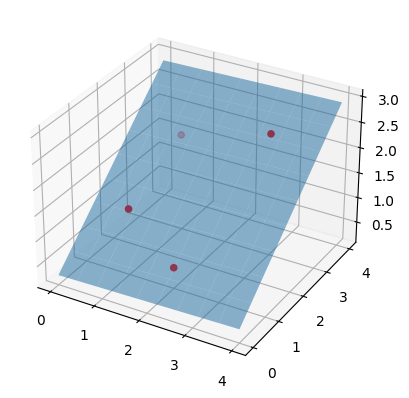

In [ ]:
# Plot your solution here
plot_hyperplane_3d(w, X, y)


❓ Compute the mean squared error produced by the linear regression.

In [ ]:
# your code here
from math import pow

sum = 0

(n_of_inputs, _) = np.shape(X)
for i in range(n_of_inputs):
  y_estimated = w.T.dot(X[i])
  print(y_estimated)
  sum += pow(y[i] - y_estimated, 2)

error = sum / n_of_inputs
print('error =', error)

0.9400000000000001
0.9600000000000001
2.2299999999999995
2.2699999999999996
error = 0.13224999999999998


## Question 2

Consider the following training data:

$\mathbf{x^{(1)}} =\begin{bmatrix} 3 \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 4 \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 6 \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 10 \end{bmatrix} $,
 $\mathbf{x^{(5)}} =\begin{bmatrix} 12 \end{bmatrix} $

$y^{(1)} = 1.5$, $y^{(2)} = 11.3$, $y^{(3)} = 20.4$, $y^{(4)} = 35.8$, $y^{(5)} = 70.1$

❓ Define `x` and `y` arrays with your data and plot it.

*Hint:* Think about what shape your data should have. E.g.:`x.shape` should be `(5,1)`

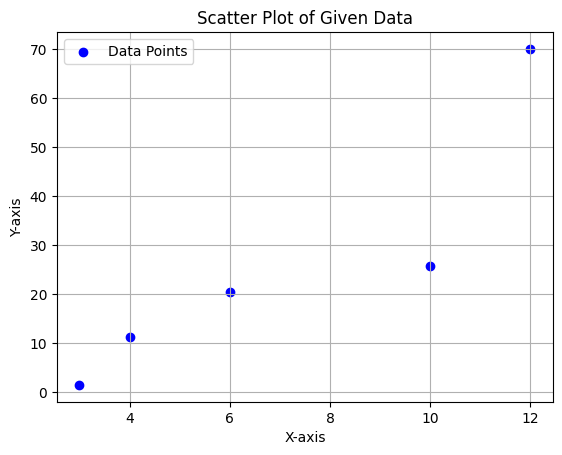

[[ 3]
 [ 4]
 [ 6]
 [10]
 [12]]


In [ ]:
# Your code here
x = np.array([[3], [4], [6], [10], [12]])
y = np.array([1.5, 11.3, 20.4, 25.8, 70.1])

plt.scatter(x, y, color='blue', label='Data Points')
plt.title('Scatter Plot of Given Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(x)


It is useful to consider non-linear regressions. In this question you will adopt **feature transformations** in order to fit non-linear regressions on the training data.

❓ Apply a logarithmic transformation $\phi(x_1) = log(x_1)$ and write down the closed form solution for this non-linear regression that minimizes the sum of squared errors on the training data.

❓ Complete function `non_linear_regression` below:

In [ ]:
'''
Inputs:
    x - vector of 1D observations, should have shape (n x 1)
    y - target vector, should have shape (n,)
    phi - function (feature transformation to apply)

Output:
    X_phi - feature matrix of shape (n x 2) (accounting for bias)
    w - vector of weights found by the Least Squares Method
'''

def non_linear_regression(x,y,phi):
    # Apply transformation

    # Construct X vector (accounting for bias)

    (num_examples, _) = np.shape(x)
    X_phi = np.concatenate([np.ones((num_examples, 1)), x], axis=1)

    for row in X_phi:
      row[1] = phi(row[1])

    # Find solution

    w = np.linalg.inv((X_phi.T.dot(X_phi))).dot(X_phi.T).dot(y)

    return X_phi, w


❓ Fit a regression on the training data with transformation $\phi(x_1) = log(x_1)$.

❓ Fit a regression on the training data with transformation $\phi(x_1) = x_1^2$.

In [ ]:
def phi1(x):
    return np.log(x)
def phi2(x):
    return x**2

In [ ]:
# Your code here
print('With logaritm:')
print(non_linear_regression(x, y, phi1))

print()

print('With square:')
print(non_linear_regression(x, y, phi2))

With logaritm:
(array([[1.        , 1.09861229],
       [1.        , 1.38629436],
       [1.        , 1.79175947],
       [1.        , 2.30258509],
       [1.        , 2.48490665]]), array([-44.15981895,  38.60249348]))

With square:
(array([[  1.,   9.],
       [  1.,  16.],
       [  1.,  36.],
       [  1., 100.],
       [  1., 144.]]), array([0.43435629, 0.41615809]))


❓ Plot both regressions along with the training points.

<ipython-input-167-4b0db679825a>:2: RuntimeWarning: invalid value encountered in log
  return np.log(x)
<ipython-input-169-5b7a49803d30>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.scatter(z, w.T.dot(np.array([1, phi1(z)])), color='red', label='Data Points')
<ipython-input-169-5b7a49803d30>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_min_phi1 = min(y.min(), w.T.dot(np.array([1, phi1(z)])).min())
<ipython-input-169-5b7a49803d30>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple o

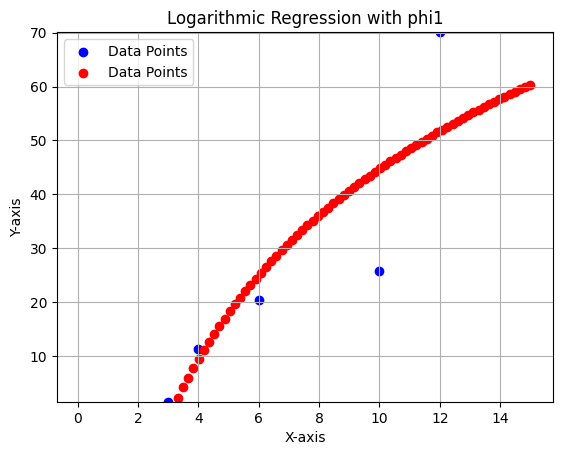

<ipython-input-169-5b7a49803d30>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.scatter(z, w.T.dot(np.array([1, phi2(z)])), color='red', label='Data Points')
<ipython-input-169-5b7a49803d30>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_min_phi2 = min(y.min(), w.T.dot(np.array([1, phi2(z)])).min())
<ipython-input-169-5b7a49803d30>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

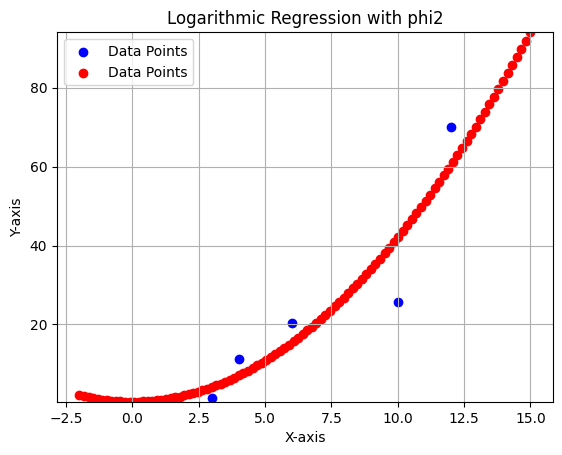

In [ ]:
#plt.scatter(x,y)
# your regressions here

z = np.linspace(-2, 15, 100)

# For the first plot with phi1
X_phi, w = non_linear_regression(x, y, phi1)
plt.scatter(x, y, color='blue', label='Data Points')
plt.scatter(z, w.T.dot(np.array([1, phi1(z)])), color='red', label='Data Points')
plt.title('Logarithmic Regression with phi1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)

# Calculate the y-axis limits for the first plot
y_min_phi1 = min(y.min(), w.T.dot(np.array([1, phi1(z)])).min())
y_max_phi1 = max(y.max(), w.T.dot(np.array([1, phi1(z)])).max())
plt.ylim(y_min_phi1, y_max_phi1)  # Set the y-axis limits

plt.show()

# For the second plot with phi2
X_phi, w = non_linear_regression(x, y, phi2)
plt.scatter(x, y, color='blue', label='Data Points')
plt.scatter(z, w.T.dot(np.array([1, phi2(z)])), color='red', label='Data Points')
plt.title('Logarithmic Regression with phi2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)

# Calculate the y-axis limits for the second plot
y_min_phi2 = min(y.min(), w.T.dot(np.array([1, phi2(z)])).min())
y_max_phi2 = max(y.max(), w.T.dot(np.array([1, phi2(z)])).max())
plt.ylim(min(y_min_phi1, y_min_phi2), max(y_max_phi1, y_max_phi2))  # Set the y-axis limits

plt.show()


❓ Which one is a better fit?

In [ ]:
# Your code here
(n, _) = np.shape(x)

X_phi, w = non_linear_regression(x, y, phi1)

sum = 0
for i in range(n):
  sum += pow(y[i] - w.T.dot(X_phi[i]), 2)

print(sum / n)


X_phi, w = non_linear_regression(x, y, phi2)

sum = 0
for i in range(n):
  sum += pow(y[i] - w.T.dot(X_phi[i]), 2)

print(sum / n)

145.99425799181188
81.72688799767505


❓ **(Optional):** Generalize your function to be able to apply several feature transformations, *i.e.*, to perform regressions of type:

$$\hat{y}(x) = w_0 + w_1\phi_1(x) + ... + w_d\phi_d(x)$$

Use your function to fit a polynomial of degree 3 to the training data.

In [ ]:
def multi_non_linear_regression(x,y,phi_list):

    # Construct X vector (accounting for bias):


    # Find solution


    return X_phi, w

## Question 3

In this exercise, we will consider binary logistic regression:


$$p_{\mathbf{w}}\left(y=1 \mid \mathbf{x}\right) = \sigma(\mathbf{w} \cdot \mathbf{x}) = \frac{1}{1+\exp\left(-\mathbf{w}\cdot\mathbf{x}\right)}$$

with the following training data:


$\mathbf{x^{(1)}} =\begin{bmatrix} -1 \\ 0  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 0 \\ 0.25  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 1 \\ -1  \\ \end{bmatrix} $

$y^{(1)} = 0$, $y^{(2)} = 1$, $y^{(3)} = 1$, $y^{(4)} = 0$

using the cross-entropy loss function.

❓ Complete function `lr_batch_gd` that computes one epoch of batch gradient descent for the logistic regression with cross-entropy loss:

In [ ]:
import math

'''
Receives:
    inputs: observations array of shape (n x (p+1)) accounting for bias
    labels: array of target values of shape (n, )
    w: initial array of weights shape ((p+1), )
    eta: scalar for learning rate
Returns:
    w: updated weights
'''

def lr_batch_gd(inputs, labels, w, eta):
    # Compute vector of probabilities of size p+1.
    size, d = np.shape(inputs)
    probs = np.empty(size,)
    for i in range(n):
      probs[i] = 1 / (1 + math.exp(-w.dot(inputs[i])))

    # Compute gradient of loss function; vector of size p+1.
    gradients = np.empty((size,d))
    for i in range(size):
      gradients[i] = -inputs[i] * (y[i] - probs[i])

    loss_function_gradient = np.sum(gradients, axis=0)

    # Gradient descent update of w
    w -= eta * loss_function_gradient

    return w

❓ Test your function on the provided training data assuming an initialization of all zeros for the weights and a learning rate of $\eta=1$

In [ ]:
x = np.array([[-1,0],
              [0, 0.25],
              [1, 1],
              [1, -1]])

# Adding column of 1s to account for bias
inputs = np.concatenate([np.ones((x.shape[0],1)), x], axis = 1)

y = np.array([0, 1, 1, 0])

n = y.size
d = np.shape(x)[1]
# Initialize weights and set learning rate
w = np.zeros(d,)

# Test function
w = lr_batch_gd(x, y, w, eta=1)
print(w)
w = lr_batch_gd(x, y, w, eta=1)
print(w)
w = lr_batch_gd(x, y, w, eta=1)
print(w)

[0.5   1.125]
[0.693412   1.74569844]
[0.84813874 2.18287157]


Let us now use **stochastic gradient descent** where we make one weight update for each training example, i.e. in one epoch there should be $n$ weight updates.

❓ Complete function `lr_sgd` to execute one epoch of stochastic gradient descent. Test your function on the training data.

*Hint:* Python's [`zip`](https://www.geeksforgeeks.org/zip-in-python/) function is useful to iterate through several lists/arrays in parallel.

In [ ]:
'''
Receives:
    inputs: observations array of shape (n x (p+1)) accounting for bias
    labels: array of target values of shape (n, )
    w: initial array of weights shape ((p+1), )
    eta: scalar for learning rate
Returns:
    w: updated weights
'''

def lr_sgd(inputs, labels, w, eta):

    # For each training example
    for input, y in zip(inputs, labels):

        # Compute probability y_hatinitial array of weights shape
        prob = 1 / (1 + math.exp(-w.dot(input)))

        # Compute gradient
        gradient = -input * (y - prob)

        # Update weights:
        w -= eta * gradient

    return w

❓ Compute 3 epochs of SGD on your training data and use the provided `plot_separation_line` to see your end results.

In [ ]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == 0, 1], inputs[labels == 0, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")

    # Plot model separation line.
    # w0 + w1*x1 + w2*x2 = 0.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

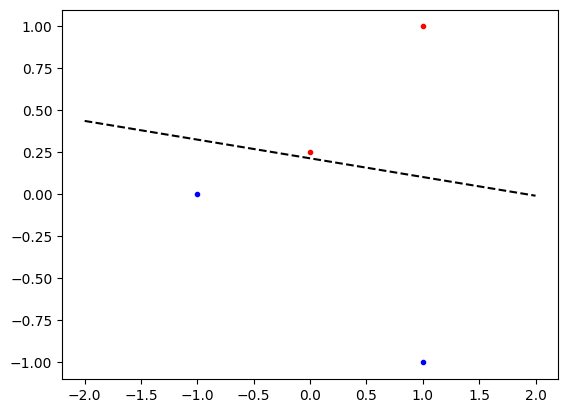

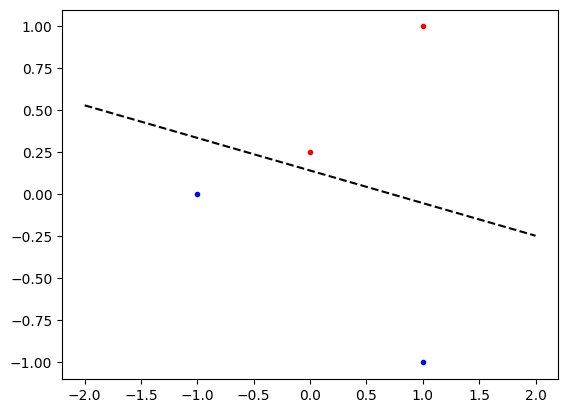

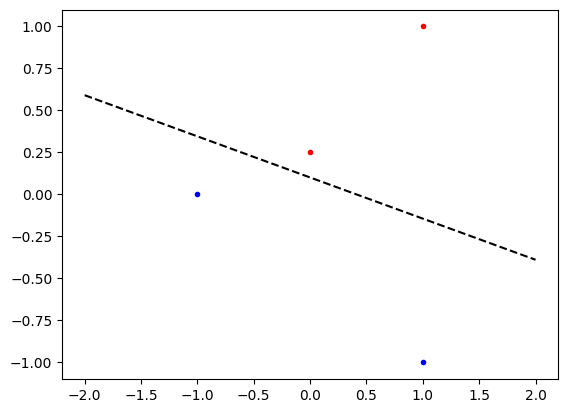

In [ ]:
# Run 3 epochs
w = np.zeros(np.shape(inputs)[1])

for i in range(3):
  w = lr_sgd(inputs, y, w, eta=1)
  plot_separation_line(inputs, y, w)



## Question 4

Logistic Regression can also be used for multi-class classification. We will use logistic regression on real data to solve the task of classifying handwritten digits.

The dataset is loaded below:

There are 1797 observations with 64 features classified into 10 classes.


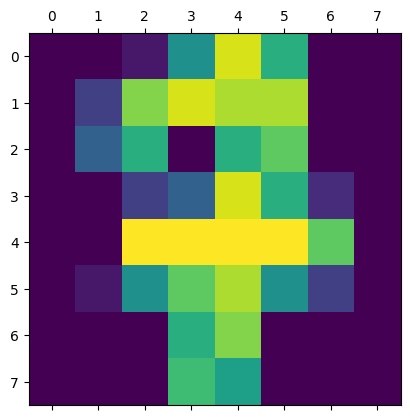

In [ ]:
from sklearn.datasets import load_digits
data = load_digits()

inputs = data.data  # num_examples x num_features
labels = data.target  # num_examples x num_labels

n, p = np.shape(inputs)
n_classes = len(np.unique(labels))  # labels are 0, 1, ..., num_labels-1

print(f'There are {n} observations with {p} features classified into {n_classes} classes.')

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((n, 1)), inputs], axis=1)

# Observation example
plt.matshow(data.images[17])
plt.show()

❓ Complete function `multi_class_lr_epoch` to run one epoch of stochastic gradient descent for multi-class logistic regression.

*Hint:* When dealing with matrix calculus one needs to be careful with dimensions. An array with shape `(n,)` is not the same as an array with shape `(n,1)`. Function [`np.expand_dims`](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) is one way to reshape your arrays into the desired format.

In [ ]:
'''
Receives:
    inputs: observations array of shape (n x (p+1)) accounting for bias
    labels: array of target values of shape (n, )
    W: initial array of weights of shape (n_classes x (p+1) )
    eta: scalar for learning rate
Returns:
    w: updated weights
'''
def multi_class_lr_epoch(inputs, labels, W, eta):
    # For each observation in data
    for index, x in enumerate(inputs):

        # Get probability scores according to the model (num_labels x 1).
        scores = W.dot(x)

        num_of_labels = np.unique(labels,).size

        # One-hot encode true label (num_labels x 1).
        one_hot = np.zeros(num_of_labels,)
        one_hot[labels[index]] = 1

        # Softmax function
        # This gives the label probabilities according to the model (num_labels x 1).
        probs = np.empty(num_of_labels,)
        i = 0
        for w in W:
          probs[i] = 1 / (1 + math.exp(-W[i].dot(x)))
          i += 1

        # SGD update. W is num_labels x num_features.
        x_expanded = np.expand_dims(x, axis=0)
        aux_expanded = np.expand_dims(probs - one_hot, axis=1)

        '''
        print(np.shape(aux_expanded))
        print(np.shape(x_expanded))
        print(np.shape(W))
        print(aux_expanded.dot(x_expanded))
        '''

        W -= eta * (aux_expanded.dot(x_expanded))

    return W

Let's split the data into train an test sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

❓ Run 100 epochs of your multi-class Logistic Regression algorithm on the training data, initializing weight matrix with zeros and learning rate of 0.001.

In [ ]:
# Your code here
(n, p) = np.shape(inputs)
W = np.zeros((np.unique(labels,).size,p))

W = multi_class_lr_epoch(inputs, labels, W, eta=0.001)

❓ Complete function `multi_class_classify` to generate predicted labels for provided inputs and trained weights $W$.

In [ ]:
'''
Receives:
    inputs: observations of shape (n x (p+1))
    W: weight matrix of shape (n_classes x p+1)
Outputs:
    y_hat: array of predicted labels of shape (n,)
'''

def multi_class_classify(inputs, W):
    # Complete function
    scores = -W.dot(inputs.T)

    for i in range(scores.shape[0]):
      for j in range(scores.shape[1]):
        scores[i][j] = 1 / (1 + math.exp(scores[i][j]))

    y_hat = np.argmax(scores, axis=0)

    return y_hat

❓ Use your function to obtain predictions for both train and test sets and compute their accuracy scores.

In [ ]:
# Your code here
(n, p) = np.shape(X_train)
W = np.zeros((np.unique(y_train,).size,p))

for _ in range(10000):
  W = multi_class_lr_epoch(X_train, y_train, W, eta=0.001)

###################

y_hat = multi_class_classify(X_train, W)

trues = 0
for index, predic in enumerate(y_hat):
  if predic == y_train[index]:
    trues += 1

print(trues)
print(y_train.size)
print(trues / y_train.size)

####################

y_hat = multi_class_classify(X_test, W)

trues = 0
for index, predic in enumerate(y_hat):
  if predic == y_test[index]:
    trues += 1

print(trues)
print(y_test.size)
print(trues / y_test.size)

1430
1437
0.9951287404314544
342
360
0.95


We can compare our results with the ones obtained with Sklearn's implementation of Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False, penalty='none')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9583333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
